In [1]:
import fairlib.src.dataloaders.loaders as fldl
import fairlib.src.dataloaders.loaders.bffhq as bffhq
import fairlib.src.dataloaders.loaders.ColoredMNIST as ColoredMNIST
import fairlib.src.dataloaders.loaders.COMPAS as COMPAS
import fairlib.src.dataloaders.loaders.Bios as Bios
from functools import partial

from fairlib import datasets
from dotmap import DotMap
import yaml, torch
from pathlib import Path
import pandas as pd
import numpy as np
import pickle


In [2]:
df  =pd.read_pickle(open("/home/user/miniconda3/analysis/results/Bios_gender_Vanilla_df.pkl","rb"))

In [3]:
df.shape[0]

5

In [4]:
fldl.default_dataset_roots['Bios_gender']

'./data/bios_gender_economy'

In [5]:
argsc=DotMap(yaml.safe_load(Path('/home/user/fairlibcode/example_conf_file/MNIST_vanilla.yaml').read_text()))

In [6]:
argscp=DotMap(yaml.safe_load(Path('/home/user/fairlibcode/example_conf_file/COMPAS_race_test.yaml').read_text()))

In [7]:
argsbs=DotMap(yaml.safe_load(Path('/home/user/fairlibcode/example_conf_file/Bios_gender_adv.yaml').read_text()))

In [8]:
datasets.name2class.keys()

dict_keys(['moji', 'bios', 'coloredmnist', 'compas', 'tp_pos', 'adult', 'coco', 'imsitu', 'bffhq', 'celeba', 'celeba_bm'])

In [9]:
argsbs

DotMap(ARL=False, ARL_n=1, BT=None, BTObj=None, DyBT=None, DyBTObj=None, DyBTalpha=0.1, DyBTinit='original', FCL=False, FCLObj='g', GBT=False, GBTObj=None, GBT_N=None, GBT_alpha=1, INLP=False, INLP_by_class=False, INLP_discriminator_reweighting=None, INLP_min_acc=0.0, INLP_n=300, activation_function='Tanh', adv_BT=None, adv_BTObj=None, adv_activation_function='ReLu', adv_batch_norm=False, adv_batch_size=512, adv_checkpoint_interval=1, adv_corr_loss=False, adv_debiasing=True, adv_decoupling=False, adv_decoupling_labelled_proportion=1.0, adv_diverse_lambda=0, adv_dropout=0.4, adv_epochs=100, adv_epochs_since_improvement=5, adv_gated=False, adv_gated_mapping=None, adv_gated_type='Augmentation', adv_hidden_size=256, adv_lambda=1.5, adv_level='last_hidden', adv_lr=0.001, adv_n_hidden=2, adv_num_subDiscriminator=3, adv_test_batch_size=512, adv_uniform_label=False, adv_update_frequency='Batch', base_seed=1, batch_norm=False, batch_size=512, checkpoint_interval=1, classification_head_update_fr

In [10]:
#import importlib
#importlib.reload(ColoredMNIST)
c=ColoredMNIST.MNISTDataset(args=argsc, split="dev")
c.load_data()
ctuple=torch.load(c.data_dir)

cdict={'features' : ctuple[0], 'target': ctuple[1], 'protected': ctuple[2] }
cdf = pd.DataFrame(cdict)


<class 'PIL.Image.Image'>
10000
Loaded data shapes: (10000, 3, 28, 28), (10000,), (10000,)
<class 'PIL.Image.Image'>
10000


In [3]:



globaldata="/home/user/miniconda3/data"
bs=DotMap ({'data_dir': f'{globaldata}/bios/bios_dev_df.pkl', "dataset": "Bios_gender", "protected_task": "gender" })
#argsbs.update(bs)
compas=DotMap({'data_dir': f'{globaldata}/compas/COMPAS_dev.pkl' })
chsy=DotMap ({'data_dir': f'{globaldata}/celeba_bm/celebMHQ_Blond_HairMale_dev_pre.pt' })
chbm_wi=DotMap ({'data_dir': f'{globaldata}/celeba_bm/celebMHQ_Blond_HairMale_dev_pre.pt' })
chbm=DotMap ({'data_dir': f'{globaldata}/celeba/celeba_dev_pre.pt' })
bffhq=DotMap ({'data_dir': f'{globaldata}/bffhq/bffhq_dev.pt' })
adult=DotMap ({'data_dir': f'{globaldata}/adult/Adult_dev.pkl'})
adultpre=DotMap ({'data_dir': f'{globaldata}/adult/adult.data', 
                  'columns': [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
    ]
                 
})
replace_countries_d={
"Dominican-Republic": "Americas",
"Japan": "Asia",
"Guatemala": "Americas",
"Vietnam": "Asia",
"Columbia": "Americas",
"Poland": "Europe",
"Haiti": "Americas",
"Portugal": "Europe",
"Iran": "Asia",
"Taiwan": "Asia",
"Greece": "Europe",
"Nicaragua": "Americas",
"Peru": "Americas",
"Ecuador": "Americas",
"Ireland": "Europe",
"France": "Europe",
"Thailand": "Asia",
"Hong": "Asia",
"Cambodia": "Asia",
"Trinadad&Tobago": "Americas",
"Yugoslavia": "Europe",
"Outlying-US(Guam-USVI-etc)": "Americas",
"Laos": "Asia",
"Scotland": "Europe",
"Honduras": "Americas",
"Hungary": "Europe",
"Holand-Netherlands": "Europe",
">50K.": ">50K",
"<=50K.": "<=50K",    
}

#bs=Bios.BiosDataset(args=argsbs, split="dev")
#bs.load_data()
#print(bs.data_dir)
#bstuple=torch.load(bs.data_dir)
adultdf=pd.concat([pd.read_pickle(adult.data_dir), pd.read_pickle(adult.data_dir.replace('dev', 'train')), 
              pd.read_pickle(adult.data_dir.replace('dev', 'test'))], ignore_index=True)

adult_pre_df=pd.concat([pd.read_csv(adultpre.data_dir, sep=',', names=adultpre.columns, skipinitialspace=True ), 
                        pd.read_csv(adultpre.data_dir.replace('.data', '.test'), sep=',', names=adultpre.columns, skipinitialspace=True )], ignore_index=True)
adult_pre_df.replace(list(replace_countries_d.keys()), list(replace_countries_d.values()), inplace=True)
adult_pre_df.name="Adult"
adult_pre_df.dropna(inplace=True, subset='sex')
bsdf=pd.concat([pd.read_pickle(bs.data_dir), pd.read_pickle(bs.data_dir.replace('dev', 'train')), 
              pd.read_pickle(bs.data_dir.replace('dev', 'test'))], ignore_index=True)
compasdf=pd.concat([pd.read_pickle(compas.data_dir), pd.read_pickle(compas.data_dir.replace('dev', 'train')), 
              pd.read_pickle(compas.data_dir.replace('dev', 'test'))], ignore_index=True)
chsydf=pd.concat([torch.load(chsy.data_dir), torch.load(chsy.data_dir.replace('dev', 'train')), 
              torch.load(chsy.data_dir.replace('dev', 'test'))], ignore_index=True)
chbmdf=pd.concat([torch.load(chbm.data_dir), torch.load(chbm.data_dir.replace('dev', 'train')), 
              torch.load(chbm.data_dir.replace('dev', 'test'))], ignore_index=True)
bffhqdf=pd.concat([torch.load(bffhq.data_dir), torch.load(bffhq.data_dir.replace('dev', 'train')), 
              torch.load(bffhq.data_dir.replace('dev', 'test'))], ignore_index=True)
chbmdf_plot=chbmdf.copy().rename( columns={"target": "Blonde", "protected": "Male"})
bffhq_plot=bffhqdf.copy().rename( columns={"target": "Young", "protected": "Male"})
compas_plot=compasdf.copy().rename( columns={"is_recid": "Recidivated", 'race': 'race_old'})
chbm_widf=torch.load(chbm_wi.data_dir)

def racecat_compas(y):
    #print(y)
    if y == 0 : return "Other"
    if y == 2 : return "Black"
    if y == 1 : return "White"
    if y == "White" : return "White"
    if y == "Black" : return "Black"
    if y == "White" : return "White"
    if y == "African-American" : return "Black"
    if y == "Caucasian" : return "White"
    return "Other"
compas_base_plot=pd.read_csv("/home/user/miniconda3/data/compas/compas-scores-two-years.csv")
#(r[ (r['race']=="African-American")| (r['race'] == "Af-Am" )].is_recid).sum()/(r['race']=="African-American").sum()
compas_base_plot.rename({"African-American": "Black", "Caucasian": "White"}, inplace=True)
compas_base_plot = compas_base_plot.rename( columns={"is_recid": "Recidivated", 'race': 'race_old'})

compas_base_plot['Race'] = compas_base_plot['race_old'].apply(racecat_compas)

compas_plot['Race']=compas_plot['race_old'].apply(racecat_compas)
compas_plot['Recidivated']= compas_plot['Recidivated'].astype(int)

adult_plot=adult_pre_df
#cpdict={'features' : cptuple[0], 'target': cptuple[1], 'protected': cptuple[2] }
#cpdf = pd.DataFrame(cpdict)

In [231]:
compas_plot.Recidivated

0       1
1       1
2       0
3       1
4       1
       ..
6167    1
6168    0
6169    0
6170    0
6171    1
Name: Recidivated, Length: 6172, dtype: int64

In [12]:
(bsdf.g=='f').sum()/bsdf.g.count()

0.46286566875856267

In [30]:
(adultdf.income==1).sum()/adultdf.income.count()

0.23928176569346055

In [29]:
((adultdf.sex==1) & (adultdf.income==1)).sum()/adultdf.income.count()

0.03621882805781909

In [16]:
1-6172/7205

0.14337265787647469

In [14]:
len(bsdf.p.unique())

28

In [174]:
compas_base_plot.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race_old', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'Recidivated', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid', 'Race'],
      dtype='object')

In [309]:
(compasdf.race==1).sum()/compasdf.shape[0]


0.34073233959818533

In [316]:
cnf=np.array([[1,2,3],[4,5,6],[7,8,9]])
FP = cnf.sum(axis=0) - np.diag(cnf) + 1e-5
FN = cnf.sum(axis=1) - np.diag(cnf) + 1e-5
TP = np.diag(cnf) + 1e-5
TN = cnf.sum() - (FP + FN + TP) + 1e-5


In [321]:
TPR = TP/(TP+FN)

In [330]:
np.sum(abs(np.stack(cnf, axis=1).reshape(-1,1)), axis=0)

array([45])

In [235]:
def compas_preprocess(temp_df):
            temp_df2 = temp_df[(
               (temp_df['days_b_screening_arrest'] <= 30 ) &  (temp_df['days_b_screening_arrest'] >= -30)  &
               (temp_df['days_b_screening_arrest'].notna() ) &
               (temp_df['c_charge_degree']  != "O") &
               ( temp_df['score_text'] != 'N/A' ) )
               ]
            return temp_df2

In [29]:
chbmdf.target.sum()/chbmdf.shape[0]

0.46973333333333334

In [35]:
((chbmdf.target==1 ) & (chbmdf.protected==1 )).sum()

10603

In [39]:
((chbmdf.target==1 ) & (chbmdf.protected==0 )).sum() / ((chbmdf.protected==0 )).sum()

0.5260856453558505

In [41]:
((chbmdf.target==1 ) & (chbmdf.protected==1 )).sum() / (chbmdf.protected==1 ).sum()

0.453740157480315

In [37]:
((chbmdf.target==0 ) & (chbmdf.protected==0 )).sum()

3143

In [38]:
((chbmdf.target==0 ) & (chbmdf.protected==1 )).sum()

12765

In [49]:
(adult_pre_df.sex=="Male").sum()

32650

In [14]:
adult_pre_df.replace(list(replace_countries_d.keys()), list(replace_countries_d.values()), inplace=True)


In [71]:
sa=adult_pre_df['income'][000]
print(f">{sa}<")

><=50K<


In [16]:
trainrows=adult_pre_df.shape[0]

In [125]:
r.shape

(7214, 53)

In [126]:
compasdf.shape

(6172, 404)

0.5508658008658008

In [123]:
(r[ (r['race']=="African-American")| (r['race'] == "Af-Am" )].is_recid).sum()

2036

In [119]:
r['race'].value_counts()

race
African-American    3696
Caucasian           2454
Hispanic             637
Other                377
Asian                 32
Native American       18
Name: count, dtype: int64

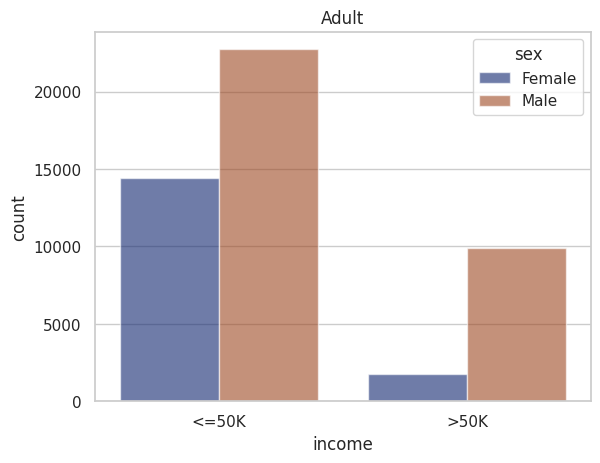

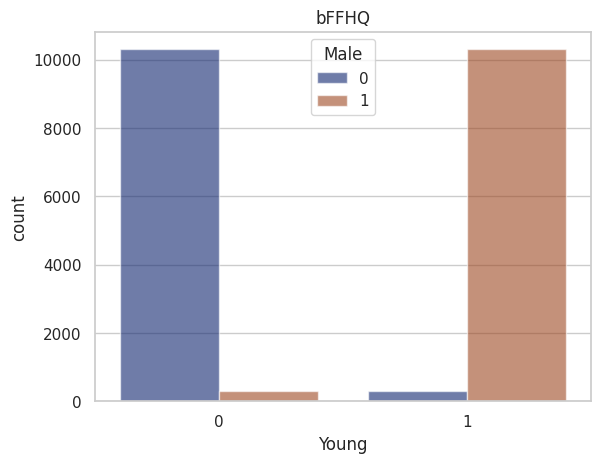

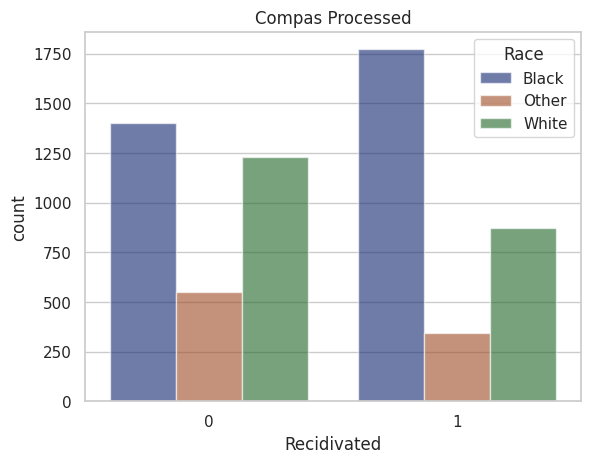

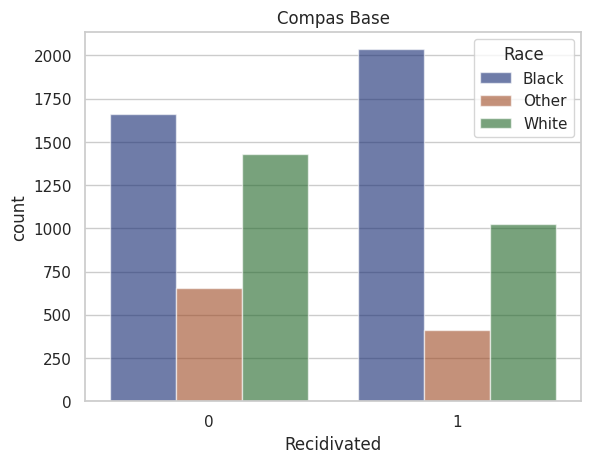

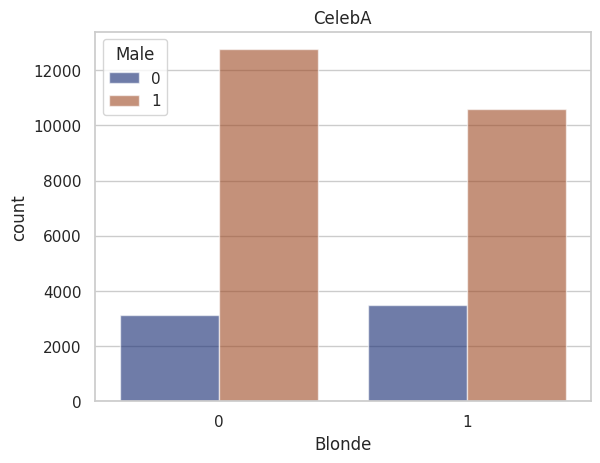

In [260]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
def DataDist(df, t, p, plotname=None):
    if plotname == None:
        try:
           plotname = df.name
        except:
           plotname="data"

      
    # Draw a nested barplot by species and sex
    g = sns.countplot(
        data=df,
        x=t,  hue=p,
        palette="dark", alpha=.6,
        hue_order = sorted(df[p].unique())
    )
    plt.title(f"{plotname}")
    plt.savefig(f"/home/user/fairlibcode/plots/{plotname}_{t}_{p}.png".replace(' ','_').lower() )
    plt.show()
adult_plot.name="Adult"
bffhq_plot.name='bFFHQ'
DataDist(adult_plot, 'income', 'sex')
DataDist(bffhq_plot, 'Young', 'Male')
compas_plot.name="Compas Processed"
compas_base_plot.name="Compas Raw"
DataDist(compas_plot, 'Recidivated', 'Race')
DataDist(compas_base_plot, 'Recidivated', 'Race', "Compas Base")
chbmdf_plot.name="CelebA"
DataDist(chbmdf_plot, 'Blonde', 'Male')
#DataDist(compas_preprocess(compas_base_plot), 'Recidivated', 'Race', "Compas_base")

In [306]:
c=1
p=1
import shutil

shutil.copy( bffhq_plot[(bffhq_plot.Young==c ) & ( bffhq_plot.Male==p  )]['index'].iloc[0], "images/bffhq/old_man1.png")
shutil.copy( bffhq_plot[(bffhq_plot.Young==c ) & ( bffhq_plot.Male==p  )]['index'].iloc[1], "images/bffhq/old_man2.png")
c=0
shutil.copy( bffhq_plot[(bffhq_plot.Young==c ) & ( bffhq_plot.Male==p  )]['index'].iloc[0], "images/bffhq/young_man1.png")
shutil.copy( bffhq_plot[(bffhq_plot.Young==c ) & ( bffhq_plot.Male==p  )]['index'].iloc[1], "images/bffhq/young_man2.png")
c=1
p=0
shutil.copy( bffhq_plot[(bffhq_plot.Young==c ) & ( bffhq_plot.Male==p  )]['index'].iloc[0], "images/bffhq/old_woman1.png")
shutil.copy( bffhq_plot[(bffhq_plot.Young==c ) & ( bffhq_plot.Male==p  )]['index'].iloc[1], "images/bffhq/old_woman2.png")
c=0
shutil.copy( bffhq_plot[(bffhq_plot.Young==c ) & ( bffhq_plot.Male==p  )]['index'].iloc[0], "images/bffhq/young_woman1.png")
shutil.copy( bffhq_plot[(bffhq_plot.Young==c ) & ( bffhq_plot.Male==p  )]['index'].iloc[1], "images/bffhq/young_woman2.png")




'images/bffhq/young_woman2.png'

In [304]:

c=1
p=1
import shutil
base="/home/user//miniconda3/data/CelebAMask-HQ/CelebA-HQ-img/"
shutil.copy( base + chbm_widf[(chbm_widf.target==c ) & ( chbm_widf.protected==p  )].index[0], "images/celebabm/blonde_man1.png")
shutil.copy( base + chbm_widf[(chbm_widf.target==c ) & ( chbm_widf.protected==p  )].index[1], "images/celebabm/blonde_man2.png")
c=0
shutil.copy( base + chbm_widf[(chbm_widf.target==c ) & ( chbm_widf.protected==p  )].index[0], "images/celebabm/not_blonde_man1.png")
shutil.copy( base + chbm_widf[(chbm_widf.target==c ) & ( chbm_widf.protected==p  )].index[1], "images/celebabm/not_blonde_man2.png")
c=1
p=0
shutil.copy( base + chbm_widf[(chbm_widf.target==c ) & ( chbm_widf.protected==p  )].index[0], "images/celebabm/blonde_woman1.png")
shutil.copy( base + chbm_widf[(chbm_widf.target==c ) & ( chbm_widf.protected==p  )].index[1], "images/celebabm/blonde_woman2.png")
c=0
shutil.copy( base + chbm_widf[(chbm_widf.target==c ) & ( chbm_widf.protected==p  )].index[0], "images/celebabm/not_blonde_woman1.png")
shutil.copy( base + chbm_widf[(chbm_widf.target==c ) & ( chbm_widf.protected==p  )].index[1], "images/celebabm/not_blonde_woman2.png")



'images/celebabm/not_blonde_woman2.png'

In [303]:
chbm_widf[(chbm_widf.target==c ) & ( chbm_widf.protected==p  )]

,target,protected,img_features
193.jpg,0,0,"[tensor(0.6217), tensor(1.0199), tensor(1.4065..."
28667.jpg,0,0,"[tensor(0.0110), tensor(0.8437), tensor(1.7057..."
16302.jpg,0,0,"[tensor(0.0056), tensor(0.1868), tensor(0.8607..."
22633.jpg,0,0,"[tensor(0.0019), tensor(0.4307), tensor(1.6880..."
19070.jpg,0,0,"[tensor(0.5088), tensor(0.3869), tensor(0.4342..."
...,...,...,...
6191.jpg,0,0,"[tensor(0.0331), tensor(0.8159), tensor(0.7929..."
26135.jpg,0,0,"[tensor(0.1064), tensor(0.4505), tensor(1.7801..."
5686.jpg,0,0,"[tensor(0.2454), tensor(1.0906), tensor(0.5761..."
25504.jpg,0,0,"[tensor(0.4950), tensor(0.5046), tensor(0.7078..."


In [299]:
!pwd

/home/user/DeepLearning/fairlibcode


In [294]:
chbm_widf

,target,protected,img_features
24993.jpg,0,1,"[tensor(1.1943), tensor(0.7562), tensor(0.2506..."
24525.jpg,0,1,"[tensor(0.3095), tensor(0.6207), tensor(0.8134..."
193.jpg,0,0,"[tensor(0.6217), tensor(1.0199), tensor(1.4065..."
28118.jpg,1,0,"[tensor(0.0406), tensor(0.5291), tensor(0.8344..."
28667.jpg,0,0,"[tensor(0.0110), tensor(0.8437), tensor(1.7057..."
...,...,...,...
5686.jpg,0,0,"[tensor(0.2454), tensor(1.0906), tensor(0.5761..."
4133.jpg,1,0,"[tensor(0.0643), tensor(1.8824), tensor(1.6099..."
3367.jpg,0,1,"[tensor(0.2395), tensor(0.6454), tensor(0.7962..."
25504.jpg,0,0,"[tensor(0.4950), tensor(0.5046), tensor(0.7078..."


/home/user/DeepLearning/fairlibcode


In [273]:
count=0
for z in filter (lambda x: x != 'age' and x!= "sex" and x!= "race", (adult_plot.columns)):
    
    print (z, end='')
    count+=1
    if count==3:
        print (' \\\\')
        count=0
    else: print( ' & ',end='')

workclass & fnlwgt & education \\
education-num & marital-status & occupation \\
relationship & capital-gain & capital-loss \\
hours-per-week & native-country & income \\


In [256]:
chbmdf_plot

,target,protected,img_features
0,0,1,"[tensor(1.1943), tensor(0.7562), tensor(0.2506..."
1,0,0,"[tensor(0.3095), tensor(0.6207), tensor(0.8134..."
2,1,1,"[tensor(0.6217), tensor(1.0199), tensor(1.4065..."
3,1,1,"[tensor(0.0406), tensor(0.5291), tensor(0.8344..."
4,0,1,"[tensor(0.0110), tensor(0.8437), tensor(1.7057..."
...,...,...,...
29995,1,1,"[tensor(0.4005), tensor(0.1340), tensor(0.5668..."
29996,0,0,"[tensor(0.6060), tensor(1.5699), tensor(0.5584..."
29997,0,1,"[tensor(0.1037), tensor(0.7122), tensor(0.4774..."
29998,1,1,"[tensor(0.0196), tensor(1.4551), tensor(0.9277..."


In [213]:
compas_plot.Recidivated.value_counts()

Recidivated
1    3182
0    2990
Name: count, dtype: int64

In [214]:
compas_plot_old=compas_plot

In [211]:
import os 
compas_plot.to_pickle(os.path.join("compas_old.pkl"))

In [212]:
!pwd

/home/user/DeepLearning/fairlibcode


In [192]:
adult_plot.dropna(subset='sex')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
48839,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K
48840,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
48841,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


In [189]:
adult_plot[adult_plot['sex'].isna()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


['Black', 'Other', 'White']

,g,p,text,start,hard_text,hard_text_untokenized,text_without_gender,bert_avg_SE,bert_cls_SE,gender_class,profession_class
0,m,surgeon,"Joel E. Holman, MD is a practicing Orthopedic ...",67,Dr. Holman graduated from Drexel University Co...,Dr. Holman graduated from Drexel University Co...,Dr. _ graduated from Drexel University College...,"[0.035273608, -0.17930578, 0.5570778, -0.01802...","[-0.719167, 0.2811058, -0.0133525105, 0.584885...",0,25
1,m,professor,Jordache A. Ellapen is an Assistant Professor ...,247,His research interests focus primarily on the ...,His research interests focus primarily on the ...,_ research interests focus primarily on the in...,"[-0.039646935, -0.059016034, 0.383483, -0.0436...","[-0.71114326, 0.2616684, -0.14193915, 0.569038...",0,21
2,f,journalist,Julia Lauter is an independent journalist base...,59,She has worked for various newspapers and maga...,She has worked for various newspapers and maga...,_ has worked for various newspapers and magazi...,"[-0.039010823, -0.057761755, 0.38003385, -0.02...","[-0.9909975, 0.0029073574, -0.19598703, 0.1440...",1,11
3,m,professor,Fredrik Wikström is an Associate Professor in ...,100,His research encompasses a wide range of susta...,His research encompasses a wide range of susta...,_ research encompasses a wide range of sustain...,"[-0.10064371, 0.2310131, 0.12148693, -0.158708...","[-0.3076348, 0.562288, -0.71838754, -1.0793735...",0,21
4,m,surgeon,"Maher J. Bahu, MD is a practicing Orthopedic S...",77,He completed a residency at McLaren Regional M...,He completed a residency at McLaren Regional M...,_ completed a residency at McLaren Regional Me...,"[-0.20923162, 0.40039727, 0.1665514, -0.251581...","[-0.31785777, 0.06298661, -0.43526924, -0.1298...",0,25
...,...,...,...,...,...,...,...,...,...,...,...
393418,m,psychologist,"Joe Bavonese, PhD is a Licensed Psychologist i...",57,Joe is the Founder and Director of the Relatio...,Joe is the Founder and Director of the Relatio...,_ is the Founder and Director of the Relations...,"[-0.14889559, -0.035120655, 0.4101979, -0.0067...","[-0.8050291, 0.26285714, -0.3695802, 0.4540420...",0,22
393419,f,teacher,Julia Stacey is a paraprofessional teacher at ...,50,She graduated from Hawaii Pacific University w...,She graduated from Hawaii Pacific University w...,_ graduated from Hawaii Pacific University wit...,"[-0.1313308, -0.06082485, 0.28147125, -0.07479...","[-0.44111663, -0.1395795, -0.23112196, 0.16685...",1,26
393420,f,teacher,Mariam Noronha is a teacher with over nine yea...,72,She has taught a wide range of management rela...,She has taught a wide range of management rela...,_ has taught a wide range of management relate...,"[-0.016473815, 0.17649534, 0.40024486, -0.1965...","[-0.84612274, -0.0444537, -0.23236755, -0.0751...",1,26
393421,m,surgeon,Dr. John Silverton is a leading plastic surgeo...,129,"Over the decades , he has treated numerous ind...","Over the decades, he has treated numerous indi...","Over the decades, _ has treated numerous indiv...","[0.13210256, -0.12660283, 0.5385441, -0.037862...","[-0.59496754, 0.33247203, -0.06132424, 0.52261...",0,25


In [17]:
adult_pre_df.iloc[:trainrows-1,:]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,33,Private,245211.0,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K.
48838,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
48839,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
48840,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.


In [18]:
32561/48842*(1-0.225)

0.5166613775029687

In [20]:
adult_pre_df["sex"].value_counts()/48842

sex
Male      0.668482
Female    0.331518
Name: count, dtype: float64

In [21]:
adult_pre_df.income.value_counts()/48842

income
<=50K     0.506122
<=50K.    0.254596
>50K      0.160538
>50K.     0.078744
Name: count, dtype: float64

In [23]:
adultdf.income.value_counts()/48842

income
0    0.760718
1    0.239282
Name: count, dtype: float64

In [ ]:
pd.set_option('display.max_rows', 900)
for x in adult_pre_df.columns:
   # print (adult_pre_df[x].value_counts())
   print (x, (adult_pre_df[x]=='?').sum()/adult_pre_df.shape[0]*100)

In [ ]:
list(replace_countries_d.keys())

In [ ]:
x[ x["native-country" ] == "Europe"]

In [ ]:
x["native-country" ].value_counts()

In [ ]:
bffhqdf_test = torch.load(bffhq.data_dir.replace('dev', 'test'))

In [ ]:
dataframestats (bffhqdf_test, 'target', 'protected', "gender", "age")

In [ ]:
bios=DotMap ({'data_dir': f'{globaldata}/bios/dev.pickle' })
profsdict={}
sum=0
print ("\\textbf{Target} & \\textbf{N instances} & \textbf{Percentage of Dataset (\\%)}  \\\\")
for i in pd.read_pickle(bios.data_dir):
    if i['p'] not in profsdict:
        profsdict[i['p']]=1
    else:
        profsdict[i['p']]+=1
    sum+=1
for i in pd.read_pickle(bios.data_dir.replace('dev', 'train')):
    if i['p'] not in profsdict:
        profsdict[i['p']]=1
    else:
        profsdict[i['p']]+=1
    sum+=1
for i in pd.read_pickle(bios.data_dir.replace('dev', 'test')):
    if i['p'] not in profsdict:
        profsdict[i['p']]=1
    else:
        profsdict[i['p']]+=1
    sum+=1
for x in sorted([ (name.replace('_', ' ').title(), n) for (name, n) in profsdict.items()], key=lambda a: a[1], reverse=True):
    print (x[0], ' & ', x[1], ' & ', '{:.1f} \\\\'.format(100.0 * float(x[1])/sum))
#bsdf.groupby('profession_class').count()
print("ALL & ", sum, " & 100 \\\\")

In [ ]:

def dataframestats(df, target_label, protected_label, title_target="1", title_protected="1"):
   def translation(name, x):
       if x==1:
           return name
       else:
           return f"Not {name}"
   t_p=partial(translation,    title_protected) 
   t_t=partial(translation,    title_target) 

   tmp=df.groupby(target_label)[protected_label].count()
   sum = tmp.sum()
   print ("\\textbf{Category} & \\textbf{Frequency} & \\textbf{Percentage}")
   
   for x in tmp.index:
       print (t_t(x), ' & ', tmp.loc[x], " & {:.1f}".format(100.0*tmp.loc[x]/sum))
   print ("\\textbf{ALL} & ", sum, " & 100")
   tmp=df.groupby(protected_label)[target_label].count() 
   print ("\\textbf{Protected} & \\textbf{Frequency} & \\textbf{Percentage}")

   
   for x in tmp.index:
       print (t_p(x), ' & ', tmp.loc[x], " & {:.1f}".format(100.0*tmp.loc[x]/sum))
   print ("\\textbf{ALL} & ", sum, " & 100")
   print("%Produced by datastats.ipynb dataframestats function")
dataframestats (chsydf, 'target', 'protected', "Smiling", "Young")
dataframestats (chbmdf, 'target', 'protected', "Blond", "Male")
dataframestats (bffhqdf[bffhqdf.target == 1 ], 'target', 'protected', "Old", "Male")

In [ ]:
bffhqdf

In [ ]:
bffhqdf

In [ ]:
tmp=chsydf
tmp['target']=tmp['target'].astype("category") 
tmp['target'].describe()
tmp['protected'].astype("category").describe()

In [ ]:
bsdf

In [ ]:
(chsydf['protected']==1).sum()/30000


In [ ]:
chbmdf.count()

In [ ]:
(chsydf['target']==1).sum()/30000

In [ ]:
o = bsdf.hard_text[1]  #WHATT


In [ ]:
bsdf['p'][0]

In [ ]:
(chbmdf.target==1).sum()/30000.

In [ ]:
(chbmdf.protected==1).sum()/30000.

In [ ]:
!pwd

In [ ]:
bsdf['hard_text'][1]

In [ ]:
import pandas as pd
!ls "{globaldata}/bios"


In [ ]:
 for i in bsdf[bsdf['p'] == bsdf['p'].mode()[0]]['bert_avg_SE'][1]: 
     print (i.shape)

In [ ]:
print(bsdf.groupby('p').count()['g'].rename_axis('profession', inplace=False).to_latex(bold_rows=True))

In [ ]:
bsdf['g'].mode()[0]["bert_avg_SE"][0]

In [ ]:
bsdf['text']

In [ ]:
211321 /393423

In [ ]:
len(list(set(list(bsdf['p']))))

In [ ]:
118110 /393423

In [ ]:

cp=COMPAS.COMPASDataset(args=argscp, split="dev")
cp.load_data()
print(cp.data_dir)
#cptuple=torch.load(cp.data_dir)
cpdf=pd.concat([pd.read_pickle(cp.data_dir), pd.read_pickle(cp.data_dir.replace('dev', 'train')), 
               pd.read_pickle(cp.data_dir.replace('dev', 'test'))])
#cpdict={'features' : cptuple[0], 'target': cptuple[1], 'protected': cptuple[2] }
#cpdf = pd.DataFrame(cpdict)


In [ ]:
data.columns

In [ ]:
data = pd.read_pickle(cp.data_dir)

In [ ]:
features={}
features['age_cat_1'] = pd.get_dummies(data['age_cat_1'])

In [ ]:
features['race']= pd.get_dummies(data['race'], prefix='race')

In [ ]:
pd.concat( [pd.concat( {'1': pd.get_dummies(data['race'], prefix='race')}.values(), axis=1), data], axis=1)

In [ ]:
list(features.values())

In [ ]:
type(pd.get_dummies(data['race'], prefix='race'))

In [ ]:
data['age_cat_1'] == data['age_cat_2']

In [ ]:
data['age_cat_1'] 

In [ ]:
data['age_cat_2']

In [ ]:
from sklearn.preprocessing import  OneHotEncoder

In [ ]:
data.index

In [ ]:
cpdf2=pd.read_csv('/home/user/miniconda3/data/compass/compas-scores-two-years.csv')

In [ ]:
cpdf2.columns
cpdf2.drop(['id', 'name', 'first', 'last', 'dob', 'race','compas_screening_date' , 'v_decile_score', 'v_score_text',
       'v_screening_date' ], axis='columns').columns

In [ ]:
cpdf2['v_charge_degree'].unique()

In [ ]:
cpdf2[ cpdf2['is_recid'] == True ]['r_charge_degree'].isna().sum()

In [ ]:
cpdf2['age_cat']

In [ ]:
cpdf2[ cpdf2['priors_count'] != cpdf2[ 'priors_count.1']] 


In [ ]:
cpdf2[ 'r_charge_desc']

In [ ]:
cpdf2[cpdf2.race == "African-American"]

In [ ]:
cpdf2[(cpdf2['race'] != "Caucasian" ) & (cpdf2['race'] != "African-American" )  ]

In [ ]:
cpdf2[cpdf2['race'] == "Caucasian" ]
#cpdf.loc[6]

In [ ]:
cpdf2[cpdf2['is_recid'] == 0 ]

In [ ]:
cpdf2[cpdf2['is_recid'] == 1]

In [ ]:
sum(cpdf.sex ==0)

In [ ]:
3743 /7214

In [ ]:
#print(cpdf2.loc[7213])
cpdf2.loc[0].days_b_screening_arrest

In [ ]:
cpdf.loc[16]

In [ ]:
cpdf2[cpdf2.days_b_screening_arrest>0].race

In [ ]:
cpdf2.columns

In [ ]:
for i in cpdf.loc[59].keys():
    print (i)

In [ ]:
cpdf[cpdf.race==0]
#cpdf.count

# 'age_cat': ['Less than 25', '25 - 45', 'Greater than 45'], 'sex': ['Male', 'Female'], 'race': ['Black', 'White', 'Other'], '

In [ ]:
vocab_dict={'a': ['z','y','x'],'b': ['2','3','1']}

In [ ]:
tmp_df = pd.DataFrame({'a':['x', 'x', 'y', 'z' ], 'b' : ['1','3','2','2']})

In [ ]:
features = {}
for col_name in vocab_dict.keys():
        features[col_name] = tmp_df[col_name].map(
            {
                j:i for i,j in enumerate(vocab_dict[col_name])
            }
        )

In [ ]:
features

In [ ]:
argsb=DotMap(yaml.safe_load(Path('/home/user/fairlibcode/example_conf_file/bffhq_vanilla.yaml').read_text()))

In [ ]:
b=bffhq.bffhqDataset(args=argsb, split="train")
b.load_data()
btuple=torch.load(b.data_file)

bdict={'IMG' : btuple[0], 'target': btuple[1], 'protected': btuple[2] }
bdf = pd.DataFrame(bdict)


In [ ]:
bdf[

In [ ]:
df[ (df.target == 1) & ( df.protected == 1)].count()

In [ ]:
df[ (df.target == 1) & ( df.protected == 0)].count()

In [ ]:
df[ (df.target == 0) & ( df.protected == 0)].count()

In [ ]:
df[ (df.target == 0) & ( df.protected == 1)].count()

In [ ]:
torch.load('/home/user/miniconda3/data')

In [ ]:
fldl.default_dataset_roots

In [ ]:
import torch

In [ ]:
 data = torch.load("/home/user/miniconda3/data/coco/train.data")

In [ ]:
 data = torch.load("/home/user/miniconda3/data/coloredmnist/colored_MNIST_train.pt")

In [ ]:
data